In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
Data = pd.read_csv(r"combined.csv")
Data.head()

,Unnamed: 0,cycle,amb_temp,date_time,voltage_battery,current_battery,temp_battery,current_load,voltage_load,time,capacity,trip
0,0,1,24,"02 Apr 2008, 15:25:41",3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234,1.856487,B0005_discharge.csv
1,1,3,24,"02 Apr 2008, 19:43:48",3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344,1.846327,B0005_discharge.csv
2,2,5,24,"03 Apr 2008, 00:01:06",3.327451,0.001026,34.232779,-0.0006,0.0,3651.641,1.835349,B0005_discharge.csv
3,3,7,24,"03 Apr 2008, 04:16:37",3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563,1.835263,B0005_discharge.csv
4,4,9,24,"03 Apr 2008, 08:33:25",3.305497,0.000009,34.345885,-0.0006,0.0,3629.172,1.834646,B0005_discharge.csv


In [3]:
#for checking missing values
missing_values = Data.isnull().sum()

In [4]:
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Unnamed: 0         0
cycle              0
amb_temp           0
date_time          0
voltage_battery    0
current_battery    0
temp_battery       0
current_load       0
voltage_load       0
time               0
capacity           0
trip               0
dtype: int64


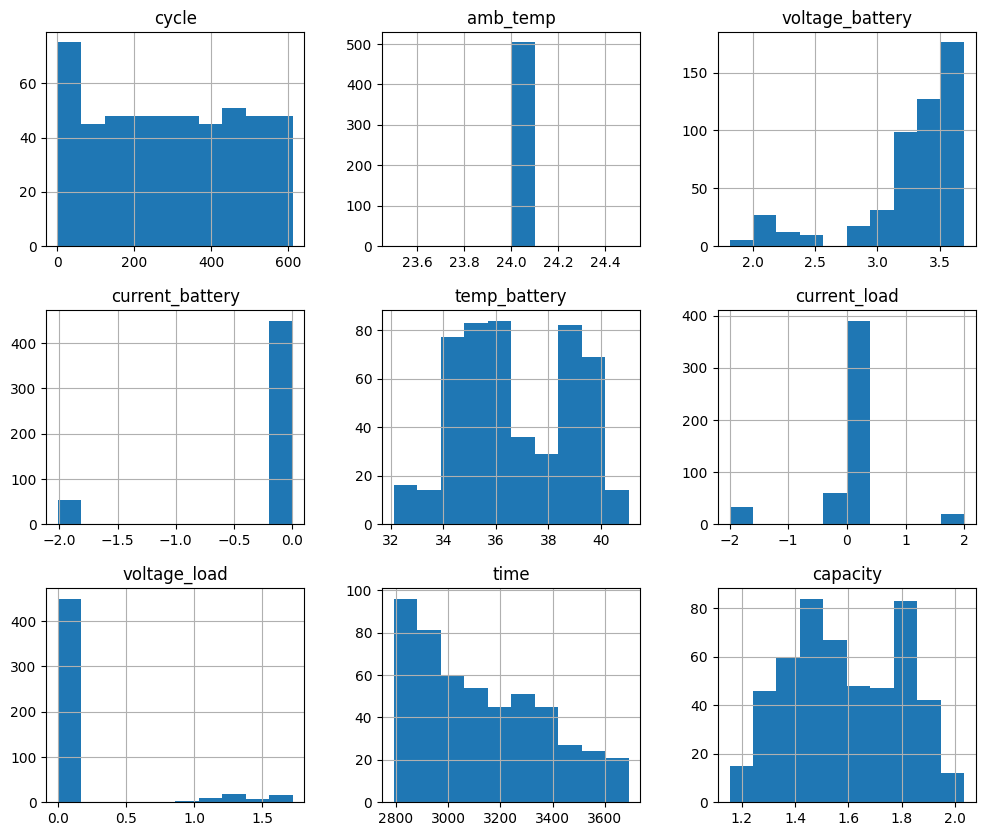

In [5]:
Data = Data.drop(['Unnamed: 0','date_time','trip'],axis=1) #Unnamed is just the index of raw data and trip denoted .csv files names
Data.hist(figsize=(12,10))
plt.show()

In [6]:
Data = Data.drop(['amb_temp','current_battery','current_load','voltage_load'],axis=1) #Columns having either constant values or maximum zero values dropped

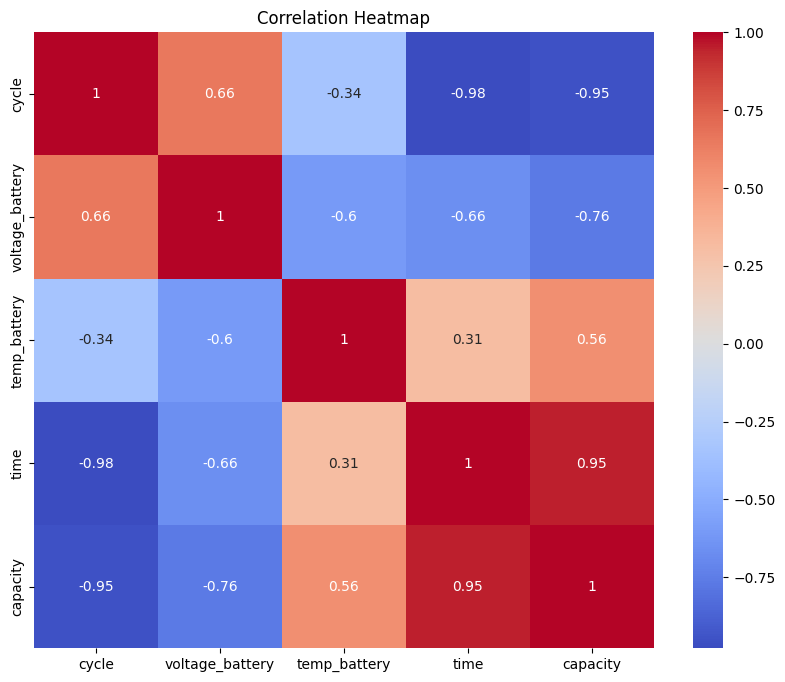

In [7]:
correlation_matrix = Data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [9]:
df_factors = Data.drop(['capacity'],axis=1)
df_factors.head()

,cycle,voltage_battery,temp_battery,time
0,1,3.277170,34.230853,3690.234
1,3,3.300245,34.392137,3672.344
2,5,3.327451,34.232779,3651.641
3,7,3.314182,34.413450,3631.563
4,9,3.305497,34.345885,3629.172


In [10]:
y1=Data['capacity']
X1=df_factors

In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [12]:
import pycaret

In [13]:
from pycaret.regression import *
s = setup(Data, target = 'capacity', session_id = 123,train_size=0.8)

,Description,Value
0,Session id,123
1,Target,capacity
2,Target type,Regression
3,Original data shape,"(504, 5)"
4,Transformed data shape,"(504, 5)"
5,Transformed train set shape,"(403, 5)"
6,Transformed test set shape,"(101, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0059,0.0001,0.0086,0.9981,0.0033,0.0037,0.0350
rf,Random Forest Regressor,0.0088,0.0002,0.0124,0.9961,0.0048,0.0056,0.0500
xgboost,Extreme Gradient Boosting,0.0106,0.0002,0.0144,0.9948,0.0056,0.0068,0.0200
gbr,Gradient Boosting Regressor,0.0106,0.0002,0.0144,0.9947,0.0056,0.0068,0.0230
lightgbm,Light Gradient Boosting Machine,0.0110,0.0002,0.0147,0.9945,0.0057,0.0071,0.0540
dt,Decision Tree Regressor,0.0117,0.0003,0.0164,0.9931,0.0063,0.0074,0.0070
ada,AdaBoost Regressor,0.0232,0.0008,0.0280,0.9807,0.0108,0.0148,0.0230
br,Bayesian Ridge,0.0252,0.0009,0.0300,0.9778,0.0116,0.0161,0.0050
lar,Least Angle Regression,0.0252,0.0009,0.0300,0.9778,0.0116,0.0161,0.0070
ridge,Ridge Regression,0.0252,0.0009,0.0300,0.9778,0.0116,0.0161,0.0060


In [15]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


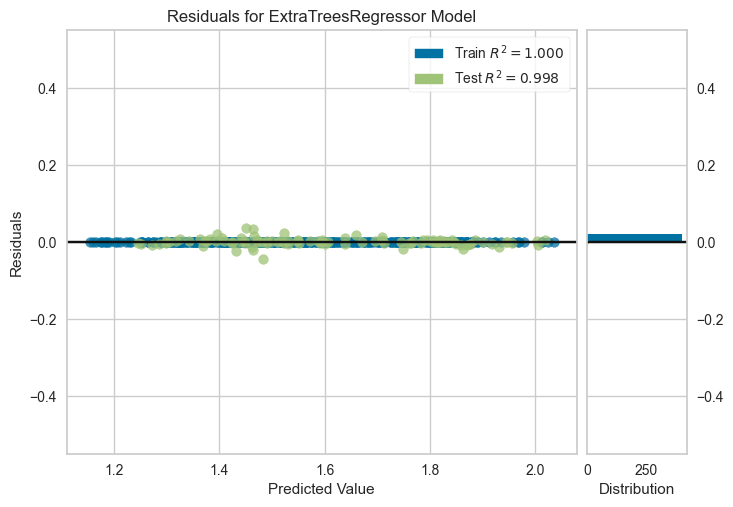

In [16]:
plot_model(best, plot = 'residuals')

In [17]:
save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['cycle', 'voltage_battery',
                                              'temp_battery', 'time'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'best_model.pkl')

In [18]:
loaded_model = load_model('best_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\bhagyesh\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['cycle', 'voltage_battery',
                                             'temp_battery', 'time'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])
